In [52]:
import numpy as np
import matplotlib.pyplot as plt


def softmax(z):
    """ Compute the softmax of vector z """
    z -= np.max(z)
    z = np.exp(z)
    return z / np.sum(z)


def softmax_output(W, x):
    z = np.dot(W, x)
    return softmax(z)


def gradient_w(X, y, W):
    m = len(X)  # 样本数
    n = len(X[0])  # 特征数
    c = len(W)  # 类别数
    grad = np.zeros((c, n))  # 梯度形状
    for k in range(c):
        for j in range(n):
            temp = []
            for i in range(m):
                temp.append((softmax_output(W, X[i])
                             [k] - (y[i][k])) * X[i][j])
            grad[k][j] = np.mean(temp)
    return grad


def softmax_cost(X, y, W):
    m = len(X)  # 样本数
    c = len(W)  # 类别数
    cost = 0
    for i in range(m):
        p = softmax_output(W, X[i])
        cost += y[i] @ np.log(p)

    return -cost / m


def softmax_train(X, y, alpha, iterate):
    m = len(X)  # 样本数
    n = len(X[0])  # 特征数
    c = len(y[0])  # 类别数
    W = np.zeros((c, n))  # 权重初始化

    for i in range(iterate):
        grad = gradient_w(X, y, W)
        W -= alpha * grad
        if i % 100 == 0:
            print('cost:', softmax_cost(X, y, W))

    return W


def softmax_predict(x, W):
    """ 预测函数 """
    x = np.append(x, 1)
    return np.argmax(softmax_output(W, x))


def generate_data(num):
    green = np.random.randn(num, 2) + np.array([0, -2])
    blue = np.random.randn(num, 2) + np.array([-2, 2])
    red = np.random.randn(num, 2) + np.array([2, 2])
    return green, blue, red


def plot_samples(green, blue, red):
    fig, axis = plt.subplots()
    axis.set(
        xlim=(-4, 4),
        ylim=(-4, 4),
        title="Softmax Regression",
        xlabel="x1",
        ylabel="x2"
    )
    plt.scatter(green[:, 0], green[:, 1], color='g')
    plt.scatter(blue[:, 0], blue[:, 1], color='b')
    plt.scatter(red[:, 0], red[:, 1], color='r')


def plot_decision_boundary(x_min, x_max, y_min, y_max, W):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = np.array([softmax_predict(x, W)
                 for x in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, alpha=0.5)

In [54]:
green, blue, red = generate_data(30)
X = np.concatenate((green, blue, red), axis=0)
X = np.c_[X, np.ones(len(X))]
y_green = np.array([[1, 0, 0]] * len(green))
y_blue = np.array([[0, 1, 0]] * len(blue))
y_red = np.array([[0, 0, 1]] * len(red))
y = np.concatenate((y_green, y_blue, y_red), axis=0)

W = softmax_train(X, y, 0.001, 5000)

cost: 1.0969001389161996
cost: 0.9462182443182644
cost: 0.8296109676504577
cost: 0.7386033887757353
cost: 0.6666497899516775
cost: 0.6089086610169661
cost: 0.561864403473098
cost: 0.5229727391352594
cost: 0.4903823269884238
cost: 0.4627322523798828
cost: 0.43900953344850463
cost: 0.4184500219840365
cost: 0.4004694913528377
cost: 0.3846154190331646
cost: 0.3705329255074222
cost: 0.3579404414660126
cost: 0.346612115904985
cost: 0.3363649431071302
cost: 0.3270492301013667
cost: 0.31854145616056895
cost: 0.3107388649153422
cost: 0.3035553255852903
cost: 0.29691813394076577
cost: 0.29076551635971204
cost: 0.285044665169846
cost: 0.2797101792516712
cost: 0.2747228165498366
cost: 0.27004848868941606
cost: 0.2656574450321733
cost: 0.26152360609747327
cost: 0.25762401560345427
cost: 0.2539383873591683
cost: 0.2504487284951787
cost: 0.24713902451290112
cost: 0.2439949746883749
cost: 0.24100376872091883
cost: 0.23815389734429357
cost: 0.2354349910449748
cost: 0.23283768215353803
cost: 0.230353486

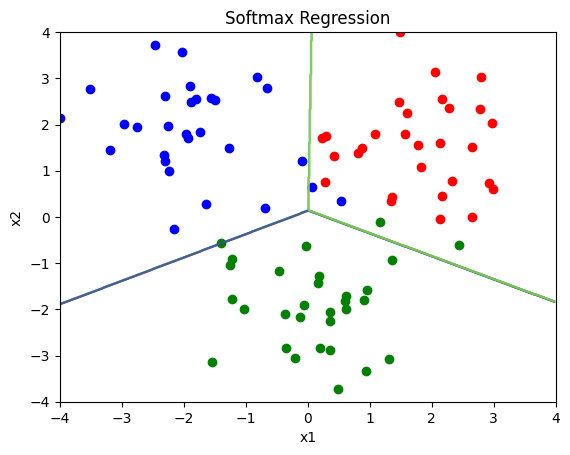

In [55]:
plot_samples(green, blue, red)
plot_decision_boundary(-4, 4, -4, 4, W)